## Importação de dados e bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("../data/processed/participantes/participantesTotais.csv")

In [2]:
df.head()

,Participante,Data de nascimento,Ocupação,Origem,Posição,Signo,Estado,Região,Idade,Sexo,Sexualidade
0,Kleber de Paula Pedra,14/02/1978,Dançarino,"Campinas, São Paulo",1,aquario,São Paulo,Sudeste,23,0,0
1,Vanessa Melanie Pascale Ekypenyong Walborn,28/11/1974,Modelo,"Rio de Janeiro, Rio de Janeiro",2,sagitario,Rio de Janeiro,Sudeste,27,1,0
2,André Batista de Carvalho,28/11/1974,Professor de canto,"Rio de Janeiro, Rio de Janeiro",3,sagitario,Rio de Janeiro,Sudeste,27,0,1
3,Antonio Sergio Tavares Campo,06/12/1972,Cabeleireiro,Angola,4,sagitario,unknown,unknown,29,0,0
4,Alessandra Begliomini,05/12/1974,Empresária,"São Paulo, São Paulo",5,sagitario,São Paulo,Sudeste,27,1,0


## Tratamento dos dados e análises

In [3]:
df.isna().sum(axis = 0)

Participante          0
Data de nascimento    0
Ocupação              0
Origem                0
Posição               0
Signo                 0
Estado                0
Região                0
Idade                 0
Sexo                  0
Sexualidade           0
dtype: int64

### Quais regiões possuem mais participantes?

<AxesSubplot:xlabel='Região', ylabel='Count'>

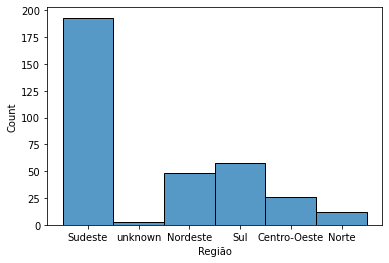

In [4]:
sns.histplot(df['Região'])

### Quais os signos mais comuns?

<AxesSubplot:xlabel='Signo', ylabel='Count'>

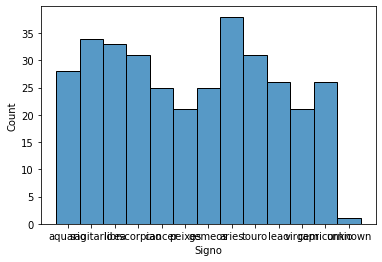

In [5]:
sns.histplot(df['Signo'])

<AxesSubplot:xlabel='Ocupação', ylabel='Count'>

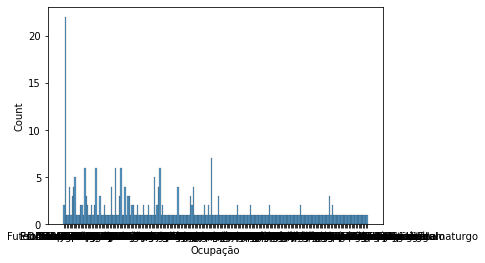

In [6]:
sns.histplot(df['Ocupação'])

<AxesSubplot:>

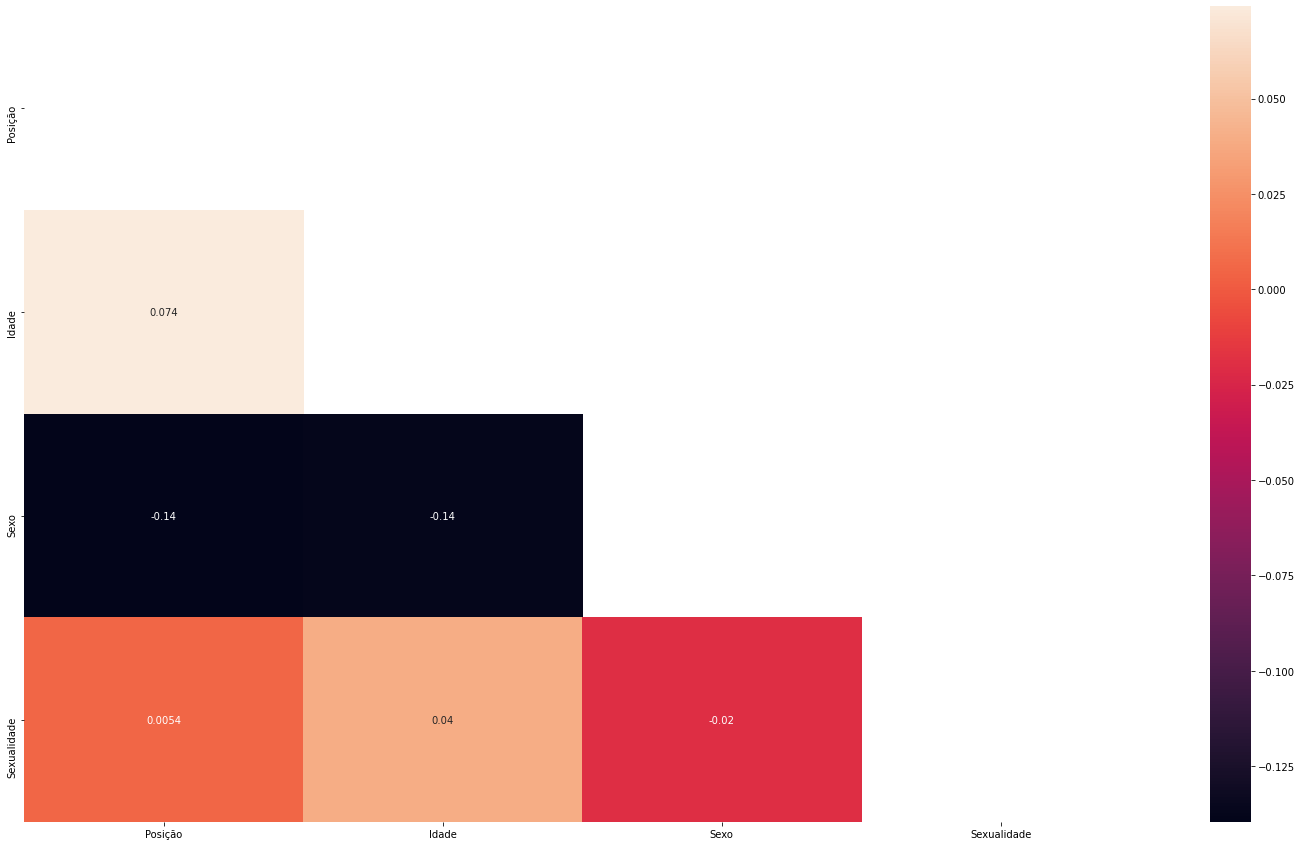

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot = True)

### Ordinal e One-Hot Encoder para variáveis categóricas

In [8]:
ordinal_columns = ['Signo','Estado']
one_hot_columns = ['Região']

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])
print(df.head())

                                 Participante Data de nascimento  \
0                       Kleber de Paula Pedra         14/02/1978   
1  Vanessa Melanie Pascale Ekypenyong Walborn         28/11/1974   
2                   André Batista de Carvalho         28/11/1974   
3                Antonio Sergio Tavares Campo         06/12/1972   
4                       Alessandra Begliomini         05/12/1974   

             Ocupação                          Origem  Posição  Signo  Estado  \
0           Dançarino             Campinas, São Paulo        1    0.0    24.0   
1              Modelo  Rio de Janeiro, Rio de Janeiro        2    9.0    20.0   
2  Professor de canto  Rio de Janeiro, Rio de Janeiro        3    9.0    20.0   
3        Cabeleireiro                          Angola        4    9.0    25.0   
4          Empresária            São Paulo, São Paulo        5    9.0    24.0   

    Região  Idade  Sexo  Sexualidade  
0  Sudeste     23     0            0  
1  Sudeste     27     1   

In [10]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)
oh_cols = pd.DataFrame(one_hot_encoder.fit_transform(df[one_hot_columns]))
df = pd.concat([df, oh_cols], axis = 1)
print(df.head())

                                 Participante Data de nascimento  \
0                       Kleber de Paula Pedra         14/02/1978   
1  Vanessa Melanie Pascale Ekypenyong Walborn         28/11/1974   
2                   André Batista de Carvalho         28/11/1974   
3                Antonio Sergio Tavares Campo         06/12/1972   
4                       Alessandra Begliomini         05/12/1974   

             Ocupação                          Origem  Posição  Signo  Estado  \
0           Dançarino             Campinas, São Paulo        1    0.0    24.0   
1              Modelo  Rio de Janeiro, Rio de Janeiro        2    9.0    20.0   
2  Professor de canto  Rio de Janeiro, Rio de Janeiro        3    9.0    20.0   
3        Cabeleireiro                          Angola        4    9.0    25.0   
4          Empresária            São Paulo, São Paulo        5    9.0    24.0   

    Região  Idade  Sexo  Sexualidade    0    1    2    3    4    5  
0  Sudeste     23     0            

### Remover o restante das variáveis categóricas

In [11]:
df.drop(['Participante','Data de nascimento','Ocupação','Origem','Região'],axis=1, inplace = True)

In [12]:
df

,Posição,Signo,Estado,Idade,Sexo,Sexualidade,0,1,2,3,4,5
0,1,0.0,24.0,23,0,0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,9.0,20.0,27,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,9.0,20.0,27,0,1,0.0,0.0,0.0,1.0,0.0,0.0
3,4,9.0,25.0,29,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,9.0,24.0,27,1,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
335,16,3.0,13.0,35,1,1,0.0,0.0,0.0,0.0,1.0,0.0
336,17,5.0,19.0,27,0,0,0.0,0.0,0.0,0.0,1.0,0.0
337,18,9.0,8.0,30,0,0,0.0,0.0,0.0,1.0,0.0,0.0
338,19,9.0,24.0,25,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
X = df.drop(['Posição'],axis = 1)
y = df['Posição']
print(X)
print(y)

     Signo  Estado  Idade  Sexo  Sexualidade    0    1    2    3    4    5
0      0.0    24.0     23     0            0  0.0  0.0  0.0  1.0  0.0  0.0
1      9.0    20.0     27     1            0  0.0  0.0  0.0  1.0  0.0  0.0
2      9.0    20.0     27     0            1  0.0  0.0  0.0  1.0  0.0  0.0
3      9.0    25.0     29     0            0  0.0  0.0  0.0  0.0  0.0  1.0
4      9.0    24.0     27     1            0  0.0  0.0  0.0  1.0  0.0  0.0
..     ...     ...    ...   ...          ...  ...  ...  ...  ...  ...  ...
335    3.0    13.0     35     1            1  0.0  0.0  0.0  0.0  1.0  0.0
336    5.0    19.0     27     0            0  0.0  0.0  0.0  0.0  1.0  0.0
337    9.0     8.0     30     0            0  0.0  0.0  0.0  1.0  0.0  0.0
338    9.0    24.0     25     0            0  0.0  0.0  0.0  1.0  0.0  0.0
339   10.0     6.0     29     1            0  0.0  1.0  0.0  0.0  0.0  0.0

[340 rows x 11 columns]
0       1
1       2
2       3
3       4
4       5
       ..
335    16
336  

In [14]:
X['Idade'].value_counts()

27    35
28    34
26    33
25    25
29    21
24    20
23    19
30    17
31    17
22    16
32    13
33    11
35    10
21     9
41     8
36     8
34     7
20     5
38     5
39     4
40     3
19     3
37     3
47     2
54     2
64     2
42     1
44     1
51     1
53     1
57     1
62     1
65     1
71     1
Name: Idade, dtype: int64

## Aplicando a regressão Linear

In [17]:
from sklearn.linear_model import SGDRegressor

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X

array([[-1.52323841,  1.05117147, -0.8565932 , ...,  0.87273022,
        -0.45351269, -0.09435082],
       [ 0.9976429 ,  0.44464063, -0.31625612, ...,  0.87273022,
        -0.45351269, -0.09435082],
       [ 0.9976429 ,  0.44464063, -0.31625612, ...,  0.87273022,
        -0.45351269, -0.09435082],
       ...,
       [ 0.9976429 , -1.37495191,  0.0889967 , ...,  0.87273022,
        -0.45351269, -0.09435082],
       [ 0.9976429 ,  1.05117147, -0.58642466, ...,  0.87273022,
        -0.45351269, -0.09435082],
       [ 1.27774082, -1.67821733, -0.04608757, ..., -1.14582947,
        -0.45351269, -0.09435082]])

In [18]:
mod = SGDRegressor()
mod.fit(X, y)

SGDRegressor()